<a href="https://colab.research.google.com/github/Avuraedor/Avuraedor/blob/main/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unsupervised Machine Learning

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Clustering

In [2]:
df= pd.read_csv('/content/winequality-red (2).csv')


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df.columns



In [4]:
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


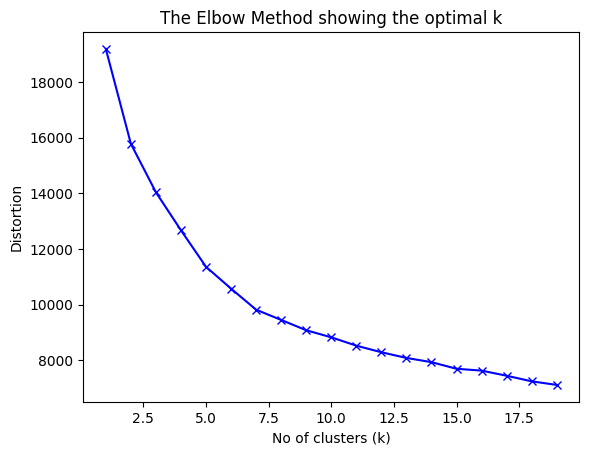

In [4]:
## Elbow Method

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt # Import matplotlib


distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    distortions.append(kmeanModel.inertia_)


    # plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('No of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show() # Call the show function to display the plot

## KMeans Clustering

In [5]:
kmeans = KMeans(init='random', n_clusters=5)
kmeans.fit(df_scaled)

KMeans(init='random', n_clusters=5)

In [15]:
kmeans.labels_

array([4, 4, 4, ..., 1, 4, 1], dtype=int32)

In [16]:
df_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


## Dimensionality Reduction

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
decomposed_df= pca.fit_transform(df_scaled)


In [7]:
decomposed_df

array([[-1.77944158,  1.15730315],
       [-1.00418467,  2.07183784],
       [-0.91578319,  1.3934342 ],
       ...,
       [-1.36626511, -0.51756099],
       [-2.36714672,  0.70354479],
       [-0.28877628, -1.24084585]])

In [8]:
decomposed_df = pd.DataFrame(decomposed_df, columns=['x1', 'x2'])


In [9]:
decomposed_df['y'] = kmeans.labels_
decomposed_df.head()

,x1,x2,y
0,-1.779442,1.157303,3
1,-1.004185,2.071838,3
2,-0.915783,1.393434,3
3,2.404077,-0.213792,0
4,-1.779442,1.157303,3


<Axes: xlabel='x1', ylabel='x2'>

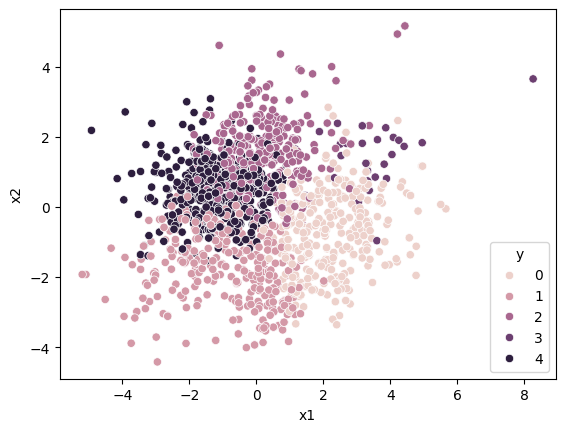

In [21]:
sns.scatterplot(x='x1', y='x2', hue='y', data=decomposed_df)

## Bad Use Case for KMeans (Moon-Shape Data)

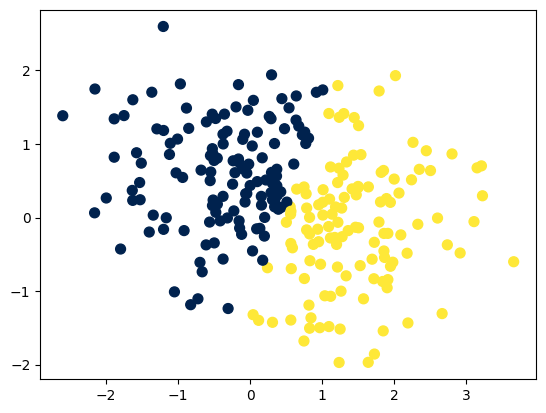

In [10]:
from sklearn.datasets import make_moons
x3, y3 = make_moons(250, noise=0.75, random_state=22)

labels = KMeans(2, random_state=0).fit_predict(x3)
plt.scatter(x3[:, 0], x3[:, 1], c=labels, s=50, cmap='cividis')
plt.show()

In [11]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(x3, labels)

216.9384231760429

In [12]:
from sklearn.metrics import davies_bouldin_score as dbs
print(dbs(df_scaled, kmeans.labels_))

1.4957612855863656


## Agglomerative Clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering() ## Added BY Avura
agg.fit(df_scaled)  ## ## Added BY Avura

AgglomerativeClustering()

In [14]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering().fit(df_scaled)


In [15]:
cluster.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
decomposed_df['y'] = cluster.labels_
decomposed_df.head()

,x1,x2,y
0,-1.779442,1.157303,0
1,-1.004185,2.071838,0
2,-0.915783,1.393434,0
3,2.404077,-0.213792,0
4,-1.779442,1.157303,0


<Axes: xlabel='x1', ylabel='x2'>

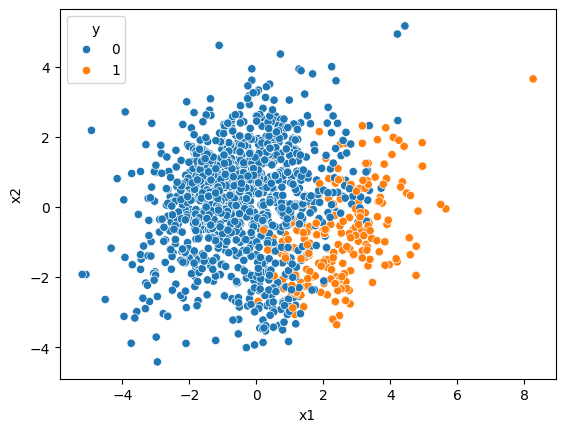

In [32]:
sns.scatterplot(x='x1', y='x2', hue='y', data=decomposed_df)

In [33]:
print(dbs(df_scaled, cluster.labels_))

1.8301360369957584


In [17]:
from sklearn.cluster import DBSCAN


In [18]:
cluster = DBSCAN().fit(df_scaled)

In [19]:
decomposed_df['y'] = cluster.labels_
decomposed_df.head()

,x1,x2,y
0,-1.779442,1.157303,-1
1,-1.004185,2.071838,-1
2,-0.915783,1.393434,-1
3,2.404077,-0.213792,-1
4,-1.779442,1.157303,-1


<Axes: xlabel='x1', ylabel='x2'>

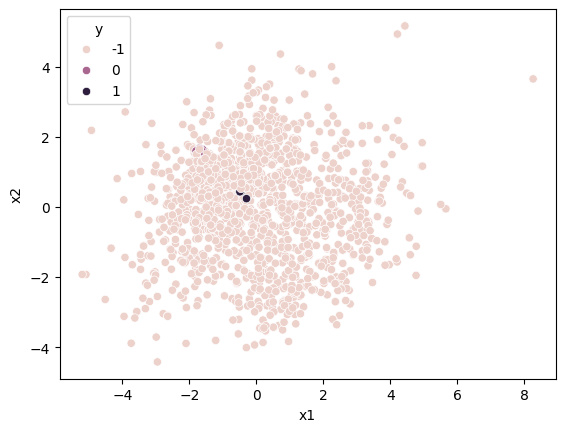

In [40]:
sns.scatterplot(x='x1', y='x2', hue='y', data=decomposed_df)

In [41]:
print(dbs(df_scaled, cluster.labels_))

1.4732012596135817


### NEW DATASET

## Dimensionality Reduction

In [20]:
df= pd.read_csv('/content/autos.csv')

In [43]:
df.head()

,Unnamed: 0,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,3/26/2016 17:47,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,...,andere,"150,000km",3,lpg,peugeot,nein,3/26/2016 0:00,0,79588,4/6/2016 6:45
1,1,4/4/2016 13:38,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,...,7er,"150,000km",6,benzin,bmw,nein,4/4/2016 0:00,0,71034,4/6/2016 14:45
2,2,3/26/2016 18:57,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,...,golf,"70,000km",7,benzin,volkswagen,nein,3/26/2016 0:00,0,35394,4/6/2016 20:15
3,3,3/12/2016 16:58,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,...,fortwo,"70,000km",6,benzin,smart,nein,3/12/2016 0:00,0,33729,3/15/2016 3:16
4,4,4/1/2016 14:38,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,...,focus,"150,000km",7,benzin,ford,nein,4/1/2016 0:00,0,39218,4/1/2016 14:38


In [44]:
df.shape

(50000, 21)

In [45]:
df.isnull().sum()

Unnamed: 0                0
dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5095
yearOfRegistration        0
gearbox                2680
powerPS                   0
model                  2758
odometer                  0
monthOfRegistration       0
fuelType               4482
brand                     0
notRepairedDamage      9829
dateCreated               0
nrOfPictures              0
postalCode                0
lastSeen                  0
dtype: int64

In [46]:
df.describe()

,Unnamed: 0,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,24999.500000,2005.073280,116.355920,5.723360,0.0,50813.627300
std,14433.901067,105.712813,209.216627,3.711984,0.0,25779.747957
min,0.000000,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,12499.750000,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,24999.500000,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,37499.250000,2008.000000,150.000000,9.000000,0.0,71540.000000
max,49999.000000,9999.000000,17700.000000,12.000000,0.0,99998.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           50000 non-null  int64 
 1   dateCrawled          50000 non-null  object
 2   name                 50000 non-null  object
 3   seller               50000 non-null  object
 4   offerType            50000 non-null  object
 5   price                50000 non-null  object
 6   abtest               50000 non-null  object
 7   vehicleType          44905 non-null  object
 8   yearOfRegistration   50000 non-null  int64 
 9   gearbox              47320 non-null  object
 10  powerPS              50000 non-null  int64 
 11  model                47242 non-null  object
 12  odometer             50000 non-null  object
 13  monthOfRegistration  50000 non-null  int64 
 14  fuelType             45518 non-null  object
 15  brand                50000 non-null  object
 16  notR

## DATA CLEANING

In [29]:
## Drop notRepairedDamage & postalCode

df.drop(['notRepairedDamage'], axis=1, inplace=True)

In [30]:
df.drop(['postalCode'], axis=1, inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           50000 non-null  int64 
 1   dateCrawled          50000 non-null  object
 2   name                 50000 non-null  object
 3   seller               50000 non-null  object
 4   offerType            50000 non-null  object
 5   price                50000 non-null  object
 6   abtest               50000 non-null  object
 7   vehicleType          44905 non-null  object
 8   yearOfRegistration   50000 non-null  int64 
 9   gearbox              47320 non-null  object
 10  powerPS              50000 non-null  int64 
 11  model                47242 non-null  object
 12  odometer             50000 non-null  object
 13  monthOfRegistration  50000 non-null  int64 
 14  fuelType             45518 non-null  object
 15  brand                50000 non-null  object
 16  date

In [53]:
df.isnull().sum()

Unnamed: 0                0
dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5095
yearOfRegistration        0
gearbox                2680
powerPS                   0
model                  2758
odometer                  0
monthOfRegistration       0
fuelType               4482
brand                     0
dateCreated               0
nrOfPictures              0
lastSeen                  0
dtype: int64

In [54]:
df.head(2)

,Unnamed: 0,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,dateCreated,nrOfPictures,lastSeen
0,0,3/26/2016 17:47,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,3/26/2016 0:00,0,4/6/2016 6:45
1,1,4/4/2016 13:38,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,4/4/2016 0:00,0,4/6/2016 14:45


In [27]:
df.drop(['vehicleType', 'model', 'fuelType'], axis=1, inplace=True)

In [28]:
df.drop(['gearbox'], axis=1, inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           50000 non-null  int64 
 1   dateCrawled          50000 non-null  object
 2   name                 50000 non-null  object
 3   seller               50000 non-null  object
 4   offerType            50000 non-null  object
 5   price                50000 non-null  object
 6   abtest               50000 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   powerPS              50000 non-null  int64 
 9   odometer             50000 non-null  object
 10  monthOfRegistration  50000 non-null  int64 
 11  brand                50000 non-null  object
 12  dateCreated          50000 non-null  object
 13  nrOfPictures         50000 non-null  int64 
 14  lastSeen             50000 non-null  object
dtypes: int64(5), object(10)
memory usage: 5.7+ MB


In [59]:
df.isnull().sum()

Unnamed: 0             0
dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
yearOfRegistration     0
powerPS                0
odometer               0
monthOfRegistration    0
brand                  0
dateCreated            0
nrOfPictures           0
lastSeen               0
dtype: int64

In [60]:
df.shape

(50000, 15)

In [25]:
df.drop(['dateCrawled', 'dateCreated', 'lastSeen'], axis=1, inplace=True)

In [26]:
df.drop(['nrOfPictures'], axis=1, inplace=True)

In [123]:
df.head(2)

,name,seller,offerType,price,abtest,yearOfRegistration,powerPS,odometer,monthOfRegistration,brand
0,24768,1,0,1727,0,2004,158,3,3,25
1,6118,1,0,2180,0,1997,286,3,6,2


In [124]:
df.shape

(50000, 10)

In [125]:
df.isnull().sum()

name                   0
seller                 0
offerType              0
price                  0
abtest                 0
yearOfRegistration     0
powerPS                0
odometer               0
monthOfRegistration    0
brand                  0
dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   name                 50000 non-null  int64
 1   seller               50000 non-null  int64
 2   offerType            50000 non-null  int64
 3   price                50000 non-null  int64
 4   abtest               50000 non-null  int64
 5   yearOfRegistration   50000 non-null  int64
 6   powerPS              50000 non-null  int64
 7   odometer             50000 non-null  int64
 8   monthOfRegistration  50000 non-null  int64
 9   brand                50000 non-null  int64
dtypes: int64(10)
memory usage: 3.8 MB


In [23]:
# Encode the categorical code

cat_col = ('name', 'seller', 'offerType', 'abtest', 'brand', 'price', 'odometer', 'nrOfPictures', 'Unnamed: 0')
from sklearn.preprocessing import LabelEncoder

# Iterate ==> Fit ==> Transform

for col in cat_col:
    # Create an object
    enc = LabelEncoder()
    
    # Fit
    enc.fit(df[col])
    
    # Tansform
    df[col] = enc.transform(df[col])

In [127]:
df.head(3)

,name,seller,offerType,price,abtest,yearOfRegistration,powerPS,odometer,monthOfRegistration,brand
0,24768,1,0,1727,0,2004,158,3,3,25
1,6118,1,0,2180,0,1997,286,3,6,2
2,34544,1,0,2214,1,2009,102,10,7,38


In [33]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df.columns

ValueError: could not convert string to float: 'Peugeot_807_160_NAVTECH_ON_BOARD'

In [22]:
from sklearn.decomposition import PCA

In [130]:
pca = PCA()

In [131]:
pca.fit(df_scaled)

PCA()

In [132]:
pca.transform(df_scaled)

array([[-0.55211134, -0.01378289,  0.64590866, ..., -0.02264369,
         0.86221805,  0.11412669],
       [ 1.93644159,  0.83095455,  0.5609405 , ..., -0.26744252,
         0.7764981 ,  0.1511574 ],
       [-1.88130942,  1.79234107, -0.94798263, ..., -0.72103684,
         0.07927676,  0.03701012],
       ...,
       [ 1.22252121,  0.57495432, -0.68232224, ...,  0.27876359,
        -1.54906638,  0.00794097],
       [ 2.20802626,  1.01344703,  0.59811665, ...,  0.59558541,
        -1.21214138, -0.06200668],
       [-0.45547585, -1.4961267 ,  0.9192639 , ...,  1.19646355,
         0.34620071,  0.04771669]])

In [34]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure and axis objects
    fig, ax = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    # Explained Variance
    evr = pca.explained_variance_ratio_
    ax[0].bar(grid, evr)
    ax[0].set(
        xlabel='Component', title='% Explained Variance', ylim=(0.0, 1.0)
)
    # Cumulative Variance
    cv = np.cumsum(evr)
    ax[1].plot(np.r_[0, grid], np.r_[0, cv], 'o-') # Use np.r_ to concatenate arrays for both x and y values
    ax[1].set(
        xlabel='Component', title='Cumulative Variance', ylim=(0.0, 1.0)
)
    # Set up figures
    fig.set(figwidth=8, dpi=100)
    return ax

In [139]:
df.shape

(50000, 10)

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': 'Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

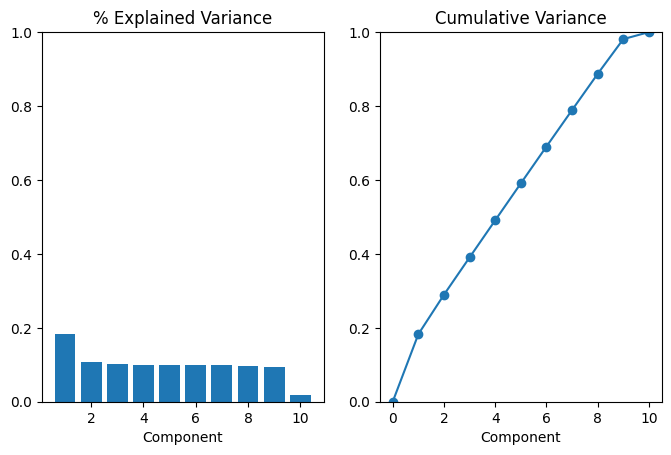

In [140]:
plot_variance(pca)

## Association Rule Mining

In [35]:
df= pd.read_csv('/content/Groceries_dataset.csv')

In [142]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,5/1/2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,1/2/2015,whole milk


In [143]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Association Rule Mining with Apriori Algorithm

In [36]:
from mlxtend.frequent_patterns import apriori, association_rules


In [38]:
## Merge Member_number with Date

df['Merged'] = df['Member_number'].astype(str) + " " + df['Date']

df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,Merged
0,1808,21-07-2015,tropical fruit,1808 21-07-2015
1,2552,5/1/2015,whole milk,2552 5/1/2015
2,2300,19-09-2015,pip fruit,2300 19-09-2015
3,1187,12/12/2015,other vegetables,1187 12/12/2015
4,3037,1/2/2015,whole milk,3037 1/2/2015


In [39]:
## Create a Dataset that maps the frequency of each item

encoded_df = pd.crosstab(df['Merged'], df['itemDescription'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
encoded_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Merged,,,,,,,,,,,,,,,,,,,,,
1000 15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000 24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000 24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000 25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000 27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999 26-12-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4999 9/4/2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000 10/2/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
def normalize(frequency):
  """
  Description:
      -This functions accepts the frequency of each column and normalizes it between 0 and 1.
      -The output is 1 if the frequency is greater than 0 otherwise it is 0.

  Input:
      -frequency <int>: Frequency of the item

  Output:
      -result <int>: Normalized frequency of the item
  """
  # Convert normalized values to binary (0 or 1)
  return [1 if x > 0 else 0 for x in frequency]

# Apply the normalize function to each column (item)
basket_input = encoded_df.apply(normalize)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
basket_input

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Merged,,,,,,,,,,,,,,,,,,,,,
1000 15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000 24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000 24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000 25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000 27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999 26-12-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4999 9/4/2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000 10/2/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(basket_input, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [43]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
2,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
3,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
4,(UHT-milk),(sausage),0.021386,0.060349,0.001136,0.053125,0.880298,-0.000154,0.992371,-0.121998


In [24]:
rules.sort_values(by=['support', 'confidence', 'lift'], ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
623,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
622,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
695,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
694,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
551,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,-0.198448
550,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
648,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
649,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851
624,(yogurt),(rolls/buns),0.085879,0.110005,0.007819,0.091051,0.827697,-0.001628,0.979147,-0.185487
625,(rolls/buns),(yogurt),0.110005,0.085879,0.007819,0.071081,0.827697,-0.001628,0.984071,-0.189562


## Rule Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-45-4386028ed6df>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


<Axes: xlabel='antecedent support', ylabel='consequent support'>

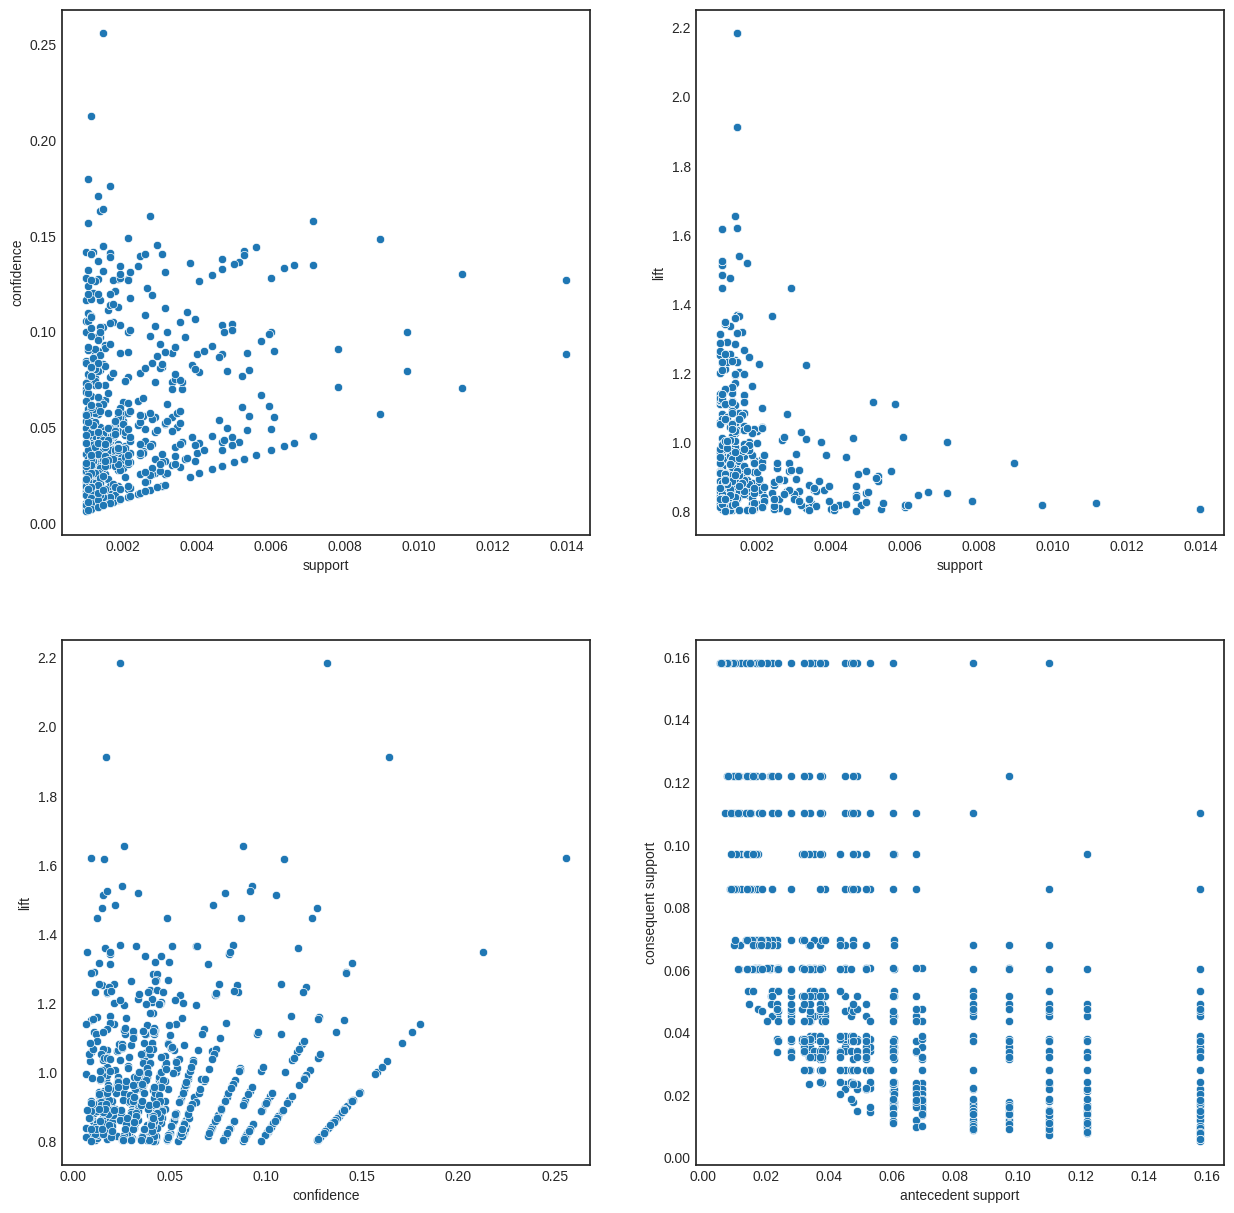

In [45]:
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')


plt.subplot(221)
sns.scatterplot(x="support", y="confidence",data=rules)

plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=rules)

plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=rules)

plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support",data=rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


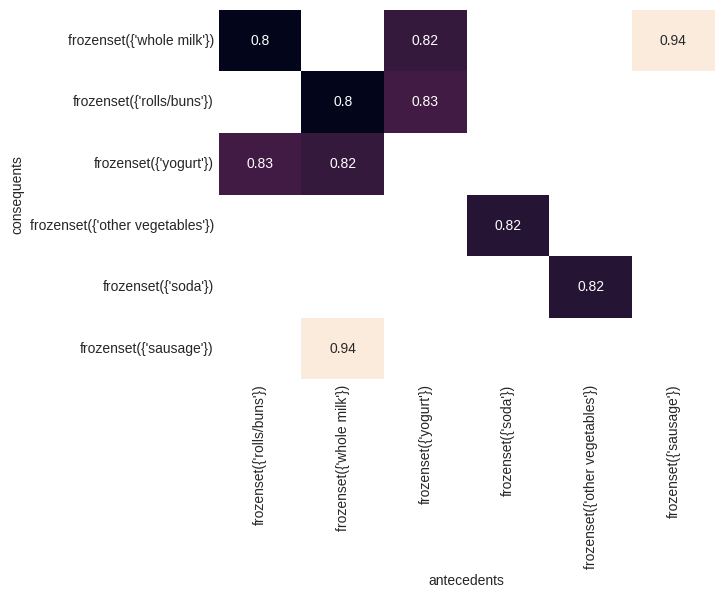

In [46]:
# Visualizing lift with heatmaps

pivot = rules.sort_values(["support", "confidence", "lift", "leverage", "conviction"], axis = 0, ascending = False).head(10).pivot(index = 'consequents', columns = 'antecedents', values= 'lift')

sns.heatmap(pivot, annot = True, cbar = False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


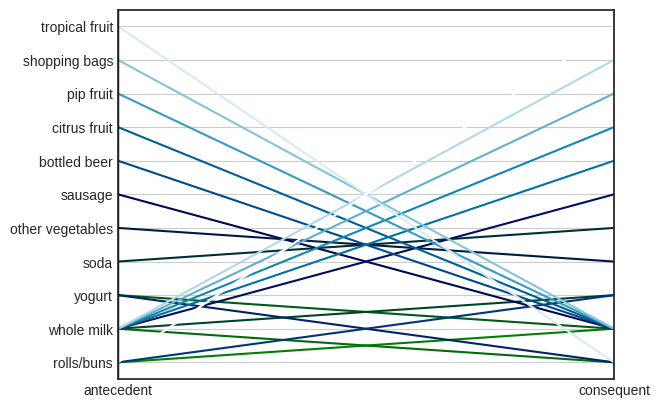

In [47]:
## # Visualizing parallel coordinates

def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

coords = rules_to_coordinates(rules.sort_values(["support", "confidence", "lift", "leverage", "conviction"], axis = 0, ascending = False).head(20))

pd.plotting.parallel_coordinates(coords, 'rule', colormap='ocean')
plt.legend([])
plt.show()